<a href="https://colab.research.google.com/github/rcpsilva/BCC342_Intro_to_Optimization/blob/main/TSP_with_Heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, INTEGER

## Problem Setup

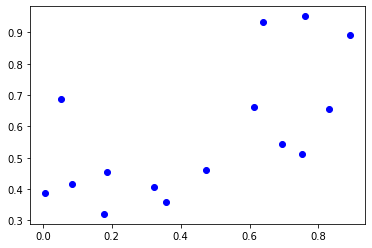

In [ ]:
n = 15
points = np.random.rand(n,2)

for p in points:
  plt.plot(p[0],p[1],'bo')

In [ ]:
dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]

In [ ]:
n = len(points)
V = set(range(len(points)))

## Python MIP

In [ ]:
model = Model()

In [ ]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V] 

In [ ]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))

In [ ]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n


In [ ]:
model.optimize()
model.objective_value

2.7729792445881674

In [ ]:
for row in x:
  vals = [e.x for e in row]
  print(vals)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0

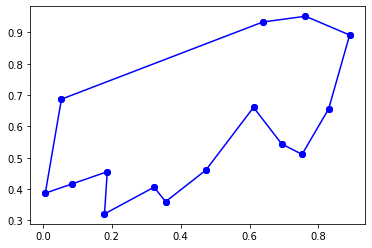

In [ ]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

## Brute force algorithms

In [ ]:
def brute_force(fobj,n,m,partial_solution=[],best_solution=[],best_val=np.inf,print_sol=False):

  if len(partial_solution) == n:
    
    fx = fobj(partial_solution)
    
    if print_sol:
      print('{} : {}'.format(partial_solution,fx))

    if fx <= best_val:
      best_solution = partial_solution
      best_val = fx

    return best_solution,best_val
  
  else:
    for e in np.arange(m):
      best_solution,best_val = brute_force(fobj,n,m,partial_solution + [e],
                best_solution,
                best_val,
                print_sol)
    
    return best_solution,best_val


In [ ]:
def brute_force_perm(fobj,n,partial_solution=[],best_solution=[],best_val=np.inf,print_sol=False):

  if len(partial_solution) == n:
    
    fx = fobj(partial_solution)
    
    if print_sol:
      print('{} : {}'.format(partial_solution,fx))

    if fx <= best_val:
      best_solution = partial_solution
      best_val = fx

    return best_solution,best_val
  
  else:
    for e in set(np.arange(n)).difference(set(partial_solution)):
      best_solution,best_val = brute_force_perm(fobj,n,partial_solution + [e],
                best_solution,
                best_val,
                print_sol)
    
    return best_solution,best_val


In [ ]:
# [0,1,2,3,4]
def tsp_perm(x):
  sum = 0
  for i in range(len(x)):
    sum += np.linalg.norm(points[x[i]] - points[x[(i+1)%len(x)]])

  return sum

In [ ]:
#best_solution,best_val = brute_force_perm(tsp_perm,n,print_sol=False)
#best_solution,best_val

In [ ]:
#for i in range(len(best_solution)):
#  px = [points[best_solution[i]][0],points[best_solution[(i+1)%len(best_solution)]][0]]
#  py = [points[best_solution[i]][1],points[best_solution[(i+1)%len(best_solution)]][1]]
  
#  plt.plot(px,py,'o-')

## Constructive heuristics

In [ ]:
def plot_perm(perm):
  best_solution = perm
  for i in range(len(best_solution)):
    px = [points[best_solution[i]][0],points[best_solution[(i+1)%len(best_solution)]][0]]
    py = [points[best_solution[i]][1],points[best_solution[(i+1)%len(best_solution)]][1]]
  
    plt.plot(px,py,'bo-')

In [ ]:
def greedy_randomized(n,dist_matrix,prob=1):
  sol = [0]

  for i in range(1,n):
    cities = list(set(range(n)).difference(set(sol)))


    if np.random.rand() < prob:
    
      closest_val = np.inf
      closest_city = None
      for c in cities:
        dist = dist_matrix[sol[-1]][c]
        if dist <= closest_val: 
          closest_val = dist
          closest_city = c
    
      sol.append(closest_city)

    else:
      sol.append(cities[np.random.randint(len(cities))])

  return sol


In [ ]:
greedy = greedy_randomized(n,dist_matrix,prob=1)
print('{}, {} , Model: {}'.format(greedy,tsp_perm(greedy),model.objective_value))

[0, 8, 12, 3, 14, 11, 10, 6, 4, 9, 2, 1, 5, 13, 7], 3.064107773257717 , Model: 2.7729792445881674


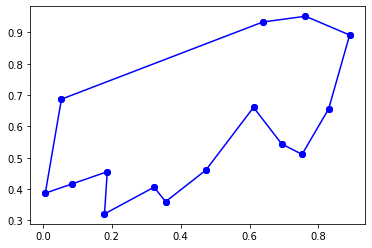

In [ ]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

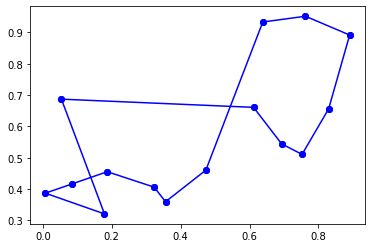

In [ ]:
plot_perm(greedy)

In [ ]:
greedy_r = greedy_randomized(n,dist_matrix,prob=0.6)
print('{}, {} , Model: {}'.format(greedy_r,tsp_perm(greedy_r),model.objective_value))

[0, 8, 1, 2, 9, 10, 14, 11, 3, 12, 4, 7, 5, 13, 6], 4.348559590558463 , Model: 2.7729792445881674


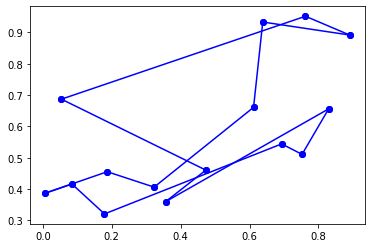

In [ ]:
plot_perm(greedy_r)

## Refinement heuritics

In [ ]:
from copy import copy

In [ ]:
def best_improvement(x,fobj):
  x = x.copy()
  best_val = np.inf
  best_sol = []
  improvement = True

  while improvement:
    improvement = False
    for i in range(len(x)):
      for j in range(i+1,len(x)):
        x[i],x[j] = x[j],x[i]
        val = fobj(x)
        if val <= best_val:
          print(best_val)
          best_val = val
          best_sol = x.copy()
          improvement = True
        x[i],x[j] = x[j],x[i]

    x = best_sol.copy()

  return best_sol

In [ ]:
bi = best_improvement(greedy,tsp_perm)

inf
3.3051009286459334
3.11253757500328
3.0887482122696515
2.9998651013178277
2.9746958781662207
2.956166934061071


In [ ]:
print('Greedy {}, {} , Model: {}'.format(greedy,tsp_perm(greedy),model.objective_value))
print('BI {}, {} , Model: {}'.format(bi,tsp_perm(bi),model.objective_value))

Greedy [0, 8, 12, 3, 14, 11, 10, 6, 4, 9, 2, 1, 5, 13, 7], 3.064107773257717 , Model: 2.7729792445881674
BI [0, 8, 12, 10, 3, 14, 11, 6, 4, 9, 2, 1, 5, 13, 7], 2.954331323503793 , Model: 2.7729792445881674


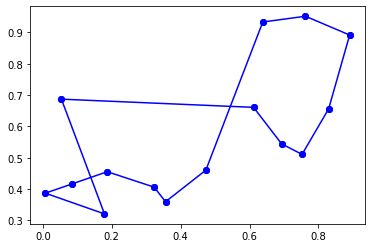

In [ ]:
plot_perm(greedy)

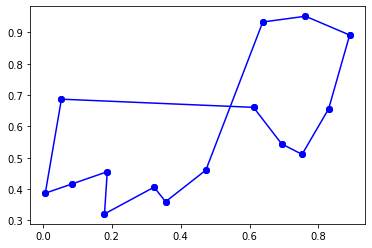

In [ ]:
plot_perm(bi)

In [ ]:
bi = best_improvement(greedy_r,tsp_perm)

inf
4.165627729246312
4.1639075813665904
4.024219709573646
4.014845702872459
3.991310512693614
3.94742593473098
3.7270731518143916
3.4943794900662173
3.4190558717633244
3.383821283897326
3.231795165546982
3.2003174685907645
3.1988859686669504
3.0417924921130997
3.0103147951568827
3.008883295233068
3.005324111724728
2.882755694342091
2.8822196701597322
2.851146083836979


In [ ]:
print('Greedy {}, {} , Model: {}'.format(greedy_r,tsp_perm(greedy_r),model.objective_value))
print('BI {}, {} , Model: {}'.format(bi,tsp_perm(bi),model.objective_value))

Greedy [0, 8, 1, 2, 9, 10, 14, 11, 3, 12, 4, 7, 5, 13, 6], 4.348559590558463 , Model: 2.7729792445881674
BI [2, 9, 4, 0, 8, 12, 10, 3, 14, 11, 6, 7, 13, 5, 1], 2.772979244588168 , Model: 2.7729792445881674


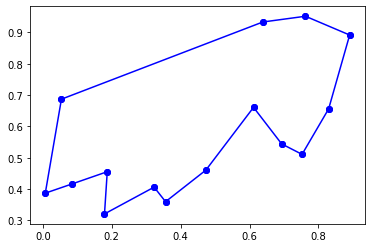

In [ ]:
plot_perm(bi)

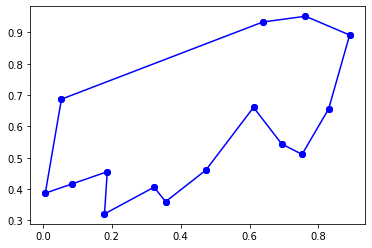

In [ ]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

In [ ]:
def first_improvement(x,fobj):
  x = x.copy()
  best_val = np.inf
  best_sol = []
  improvement = True

  while improvement:
    improvement = False
    for i in range(len(x)):
      for j in range(i+1,len(x)):
        x[i],x[j] = x[j],x[i]
        val = fobj(x)
        if val <= best_val:
          print(best_val)
          best_val = val
          best_sol = x.copy()
          improvement = True
          break
        x[i],x[j] = x[j],x[i]

      if improvement:
        break

  return best_sol

In [ ]:
bi = best_improvement(greedy_r,tsp_perm)
fi = first_improvement(greedy_r,tsp_perm)

inf
4.165627729246312
4.1639075813665904
4.024219709573646
4.014845702872459
3.991310512693614
3.94742593473098
3.7270731518143916
3.4943794900662173
3.4190558717633244
3.383821283897326
3.231795165546982
3.2003174685907645
3.1988859686669504
3.0417924921130997
3.0103147951568827
3.008883295233068
3.005324111724728
2.882755694342091
2.8822196701597322
2.851146083836979
inf
4.165627729246312
4.1460306522914685
4.024219709573646
4.014845702872459
3.9940171910826843
3.942262209005973
3.8972310255620255
3.660802794450456
3.4750635178887763
3.3525718120826236
3.0750193615486103
3.0557785528352963
3.0228693559552653
3.010244775021262


In [ ]:
print('Greedy {}, {} , Model: {}'.format(greedy_r,tsp_perm(greedy_r),model.objective_value))
print('BI {}, {} , Model: {}'.format(bi,tsp_perm(bi),model.objective_value))
print('FI {}, {} , Model: {}'.format(fi,tsp_perm(fi),model.objective_value))

Greedy [0, 8, 1, 2, 9, 10, 14, 11, 3, 12, 4, 7, 5, 13, 6], 4.348559590558463 , Model: 2.7729792445881674
BI [2, 9, 4, 0, 8, 12, 10, 3, 14, 11, 6, 7, 13, 5, 1], 2.772979244588168 , Model: 2.7729792445881674
FI [2, 9, 0, 8, 12, 10, 3, 14, 11, 6, 4, 7, 13, 5, 1], 2.8202421015873798 , Model: 2.7729792445881674


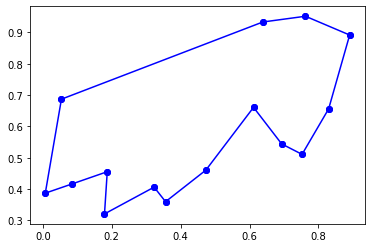

In [ ]:
plot_perm(bi)

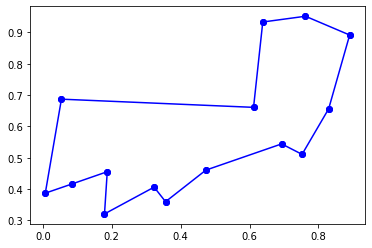

In [ ]:
plot_perm(fi)

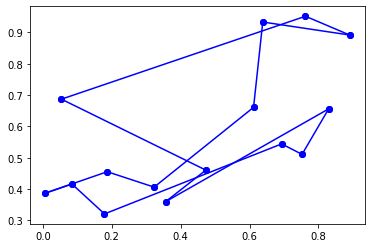

In [ ]:
plot_perm(greedy_r)

## Branch and bound